In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 866 kB/s 
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import datetime as dt

In [3]:
def dataset_loader(stock_name):
  ticker = yf.Ticker(stock_name)
  dataset = ticker.history(period = 'max')
  dataset = dataset.sort_values('Date', ascending = True)

  start_date = str(dataset.index[0]).split()[0]
  end_date = str(dataset.index[-1]).split()[0]

  close_array = dataset.loc[:, 'Close'].values.reshape(-1,1)
  
  return close_array

In [4]:
stock_name = 'F'
data = dataset_loader(stock_name)

In [5]:
len(data)

12511

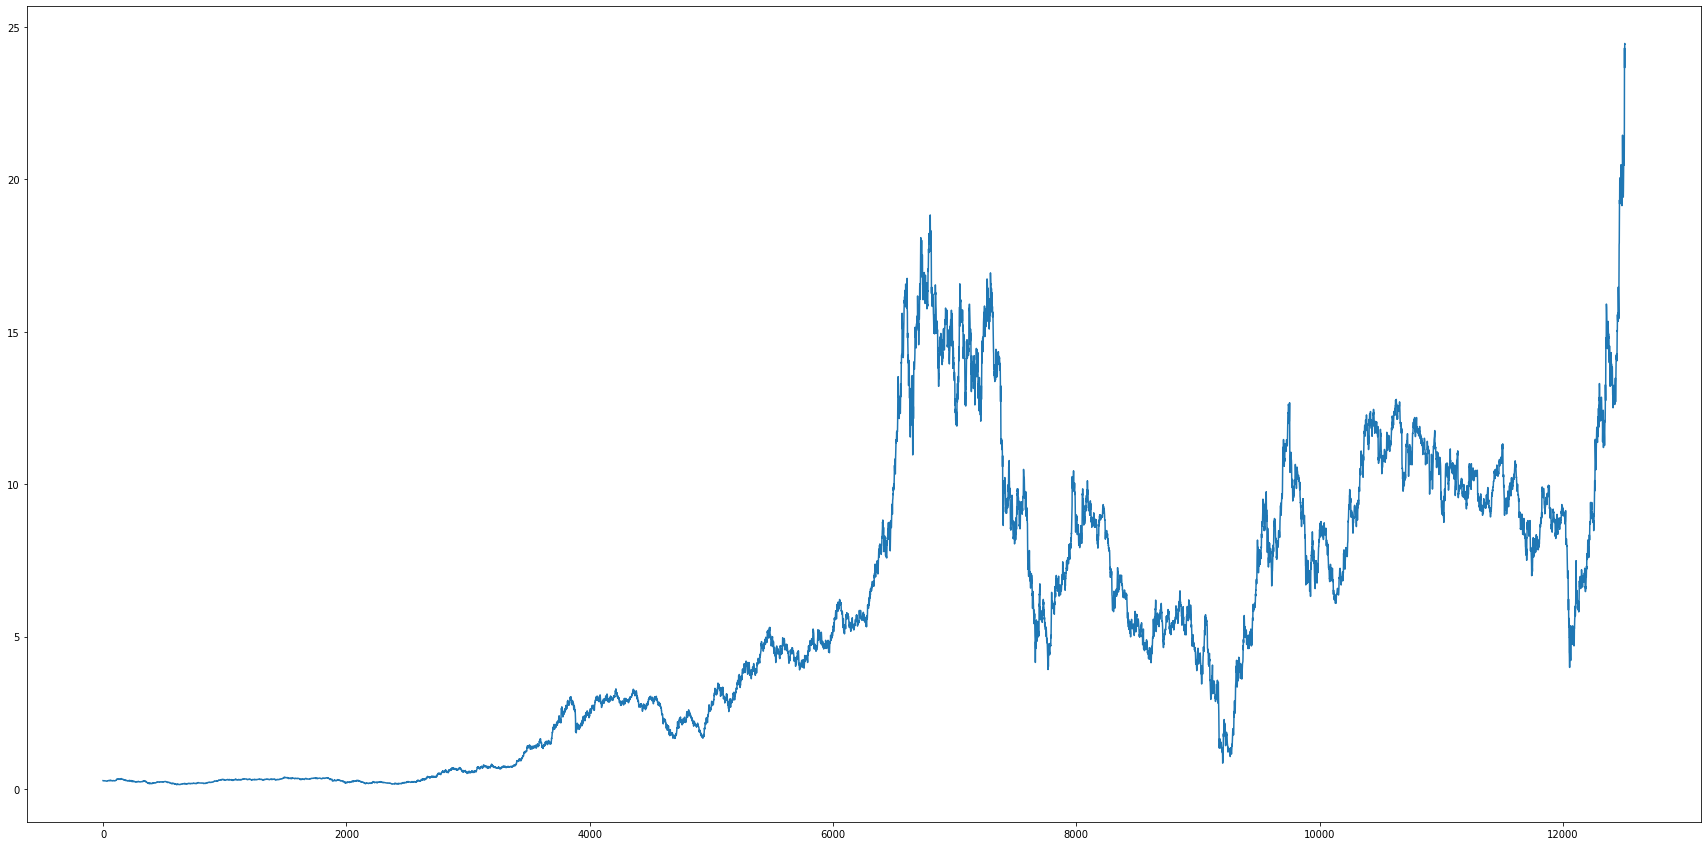

In [6]:
plt.figure(figsize = (30,15))
plt.plot(data)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data

array([[ 0.27601686],
       [ 0.27549702],
       [ 0.27549702],
       ...,
       [23.65999985],
       [24.45999908],
       [24.44000053]])

In [9]:
train_lim = round(0.8 * len(data))

In [10]:
X_train = data[: train_lim]
X_train

array([[0.27601686],
       [0.27549702],
       [0.27549702],
       ...,
       [8.26769638],
       [8.32186794],
       [8.4098959 ]])

In [11]:
X_test = data[train_lim:]
X_test

array([[ 8.34895134],
       [ 8.30155277],
       [ 8.66043186],
       ...,
       [23.65999985],
       [24.45999908],
       [24.44000053]])

In [12]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = (0,1))
training_set_scaled =  scaler.fit_transform( X_train )
training_set_scaled

array([[0.00721478],
       [0.00718697],
       [0.00718697],
       ...,
       [0.43475644],
       [0.43765453],
       [0.44236388]])

In [13]:
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i - 60: i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.00721478, 0.00718697, 0.00718697, ..., 0.00748273, 0.00807287,
        0.00784806],
       [0.00718697, 0.00718697, 0.00702012, ..., 0.00807287, 0.00784806,
        0.00765134],
       [0.00718697, 0.00702012, 0.00693669, ..., 0.00784806, 0.00765134,
        0.00765134],
       ...,
       [0.41390319, 0.39225303, 0.39477895, ..., 0.45503822, 0.45900752,
        0.45395578],
       [0.39225303, 0.39477895, 0.40091301, ..., 0.45900752, 0.45395578,
        0.43475644],
       [0.39477895, 0.40091301, 0.39910897, ..., 0.45395578, 0.43475644,
        0.43765453]])

In [15]:
# Redimensión de los datos

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )
X_train

array([[[0.00721478],
        [0.00718697],
        [0.00718697],
        ...,
        [0.00748273],
        [0.00807287],
        [0.00784806]],

       [[0.00718697],
        [0.00718697],
        [0.00702012],
        ...,
        [0.00807287],
        [0.00784806],
        [0.00765134]],

       [[0.00718697],
        [0.00702012],
        [0.00693669],
        ...,
        [0.00784806],
        [0.00765134],
        [0.00765134]],

       ...,

       [[0.41390319],
        [0.39225303],
        [0.39477895],
        ...,
        [0.45503822],
        [0.45900752],
        [0.45395578]],

       [[0.39225303],
        [0.39477895],
        [0.40091301],
        ...,
        [0.45900752],
        [0.45395578],
        [0.43475644]],

       [[0.39477895],
        [0.40091301],
        [0.39910897],
        ...,
        [0.45395578],
        [0.43475644],
        [0.43765453]]])

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [17]:
# Inicializacion del modelo
regressor = Sequential()
# Añadir la primera capade LSTM
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ) )
# Reguslarizacion por Dropout
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50 ) )
regressor.add(Dropout(0.2))

In [18]:
regressor.add( Dense(units = 1) )

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [20]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
311/311 [==============================] - 30s 61ms/step - loss: 0.0032
Epoch 2/20
311/311 [==============================] - 19s 61ms/step - loss: 0.0014
Epoch 3/20
311/311 [==============================] - 19s 61ms/step - loss: 0.0012
Epoch 4/20
311/311 [==============================] - 19s 61ms/step - loss: 0.0010
Epoch 5/20
311/311 [==============================] - 19s 62ms/step - loss: 9.4986e-04
Epoch 6/20
311/311 [==============================] - 19s 62ms/step - loss: 9.1971e-04
Epoch 7/20
311/311 [==============================] - 19s 61ms/step - loss: 0.0010
Epoch 8/20
311/311 [==============================] - 19s 61ms/step - loss: 7.8567e-04
Epoch 9/20
311/311 [==============================] - 19s 61ms/step - loss: 7.3510e-04
Epoch 10/20
311/311 [==============================] - 19s 61ms/step - loss: 8.1230e-04
Epoch 11/20
311/311 [==============================] - 19s 61ms/step - loss: 7.8865e-04
Epoch 12/20
311/311 [==============================] - 19s 61

In [21]:
real_stock_price = X_test
dataset_total = data
inputs = dataset_total[len(dataset_total) - len(X_test) - 60 :]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [22]:
len(inputs)

2562

In [23]:
inputs_1 = inputs
for j in range(100):
  X_test1 = []

  for i in range(60, len(inputs_1) + 1):
    X_test1.append(inputs_1[i - 60: i, 0])

  X_test1 = np.array(X_test1)

  
  X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1) )
  


  inputs_1 = np.append(inputs_1[1:], regressor.predict(X_test1)[-2:-1]).reshape(-1,1)


y = scaler.inverse_transform(inputs_1)
print(y)




[[ 8.46406269]
 [ 8.45052052]
 [ 8.54531765]
 ...
 [10.7060598 ]
 [10.66575467]
 [10.62571471]]


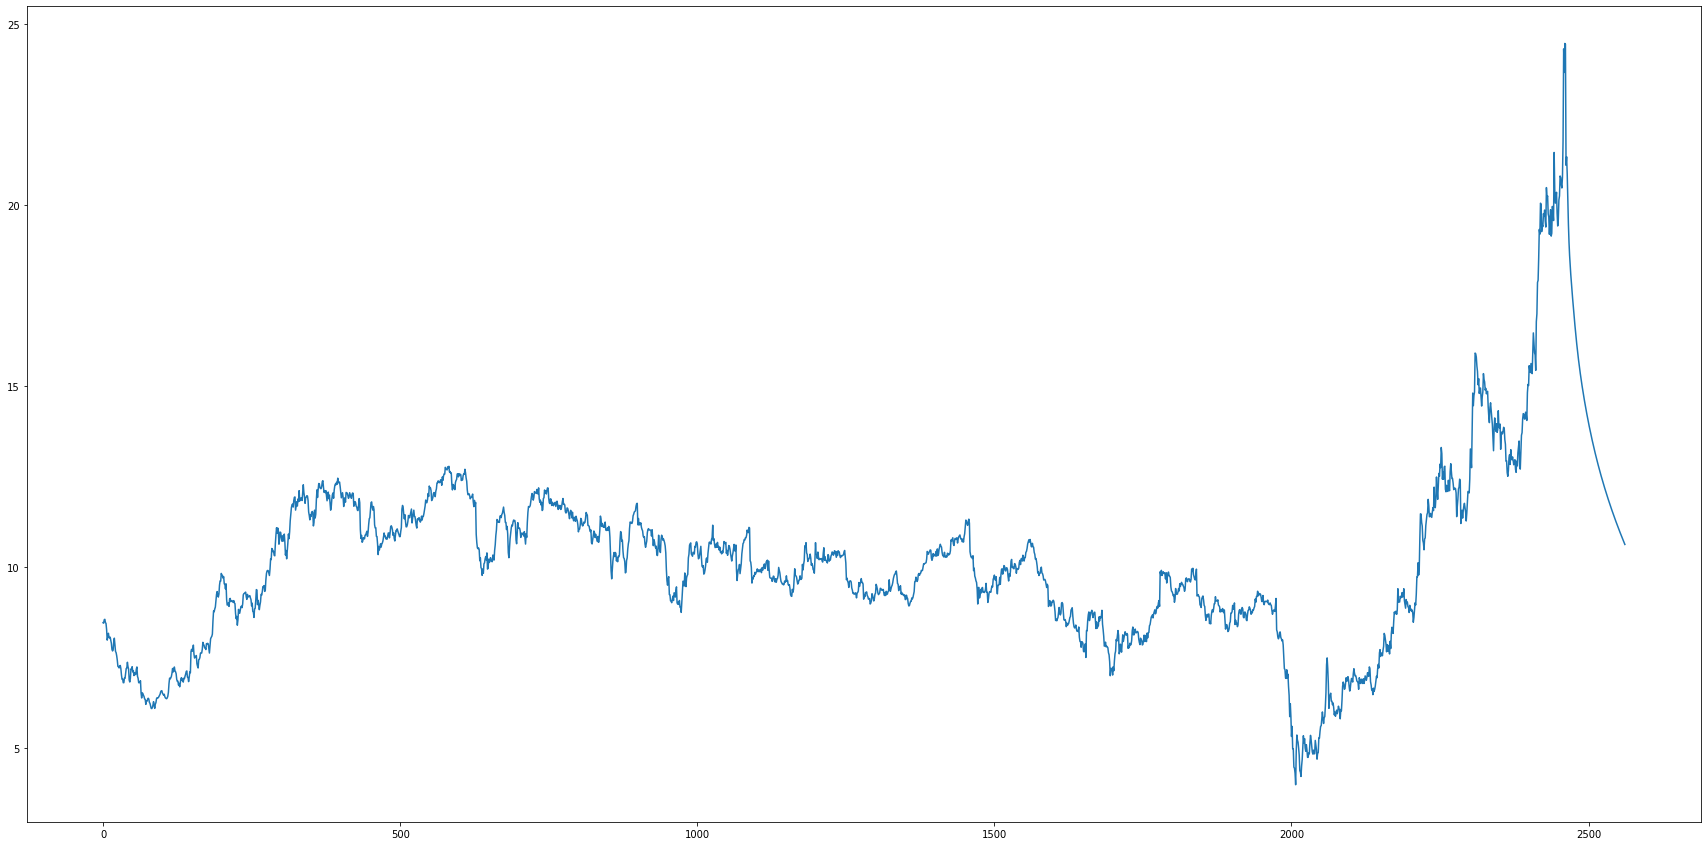

In [24]:
plt.figure(figsize = (30, 15))
plt.plot(y)

In [25]:
len(y)

2562

In [26]:
len(inputs_1)

2562

In [27]:
X_test = []

for i in range(61, len(inputs) + 1):
  X_test.append(inputs[i - 60: i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )

In [28]:
predicted_stock_price = regressor.predict(X_test)

In [29]:
predicted_stock_price = scaler.inverse_transform( predicted_stock_price )
predicted_stock_price

array([[ 8.2026005],
       [ 8.164266 ],
       [ 8.192956 ],
       ...,
       [20.602161 ],
       [21.096807 ],
       [21.330868 ]], dtype=float32)

In [30]:
len(real_stock_price)

2502

In [31]:
len(predicted_stock_price)

2502

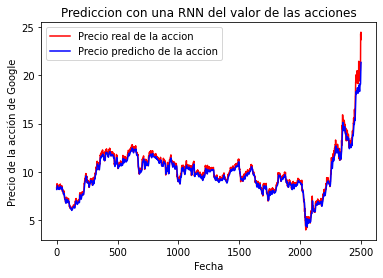

In [32]:
plt.plot(real_stock_price, color = 'red', label = 'Precio real de la accion')

plt.plot(predicted_stock_price, color = 'blue', label = 'Precio predicho de la accion')
plt.title('Prediccion con una RNN del valor de las acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de la acción de Google')
plt.legend()
plt.show()

In [33]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

0.3698515292174337